In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

/Users/sukaraca/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df = pd.read_csv("z_score_extremity.csv")
df

,outlet,Extremity,label,Drives_zscore,Cognition_zscore,emo_pos_zscore,emo_neg_zscore,emo_anx_zscore,emo_anger_zscore,emo_sad_zscore,Social_zscore,Lifestyle_zscore,Physical_zscore,focuspast_zscore,focuspresent_zscore,focusfuture_zscore,Moral_zscore,Affect_zscore,Moral-Emotional_zscore
0,Daily Caller,0.499892,0,-0.953551,0.005567,-0.506355,0.535480,-0.462869,0.648593,-0.260377,0.256576,-0.298635,-0.217865,0.292218,-0.565834,-0.748367,0.023332,-1.582358,0.359187
1,NYTimes,0.499977,1,-1.620571,-0.469588,-0.506355,-0.377186,-0.462869,-0.556865,1.533608,-1.588470,-0.558101,-0.554234,-0.683851,-0.074194,-0.558605,-0.169902,0.312998,1.225537
2,HuffPost,0.499961,1,0.991925,0.718300,-0.506355,-0.911429,-0.462869,-0.556865,-0.260377,0.743354,0.716862,-0.751133,-0.889910,-0.008153,1.022750,-0.069715,-0.472217,-0.381973
3,FoxNews,0.499971,0,-0.167949,1.145940,-0.506355,0.713561,0.452696,-0.556865,1.533608,0.337706,-1.510968,-0.357335,0.129540,0.131267,-0.862225,-0.487775,0.617208,0.986738
4,CNN,0.499972,1,-0.167949,0.623269,-0.506355,0.713561,1.368261,0.319832,-0.260377,0.403133,-1.077033,-0.152232,-0.526595,1.907039,-0.558605,-0.725825,1.675490,-0.685518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,HuffPost,0.499933,1,-0.986902,0.683744,0.275267,0.112537,0.414548,-0.556865,-0.260377,-0.101965,0.609497,-0.562438,-0.504905,0.512838,0.567320,0.056417,1.450810,-0.204633
176,HuffPost,0.495781,1,0.006217,-0.987939,2.144361,-0.332665,-0.462869,-0.556865,1.683107,-0.630616,-0.781779,-0.111211,-0.542863,-0.485117,-0.836923,3.101734,-0.799911,3.534732
177,HuffPost,0.499833,1,-1.335235,0.830610,0.309250,-0.377186,-0.462869,0.319832,-0.260377,1.224898,-0.535733,0.438465,2.493796,-1.651844,-0.862225,-1.916075,1.557903,1.822866
178,HuffPost,0.499985,1,0.954868,-1.186640,-0.506355,1.225544,-0.462869,0.319832,1.533608,0.418836,0.515552,2.391047,-1.584003,1.679565,-0.862225,0.894964,0.324366,0.956734


## Correlation Matrix

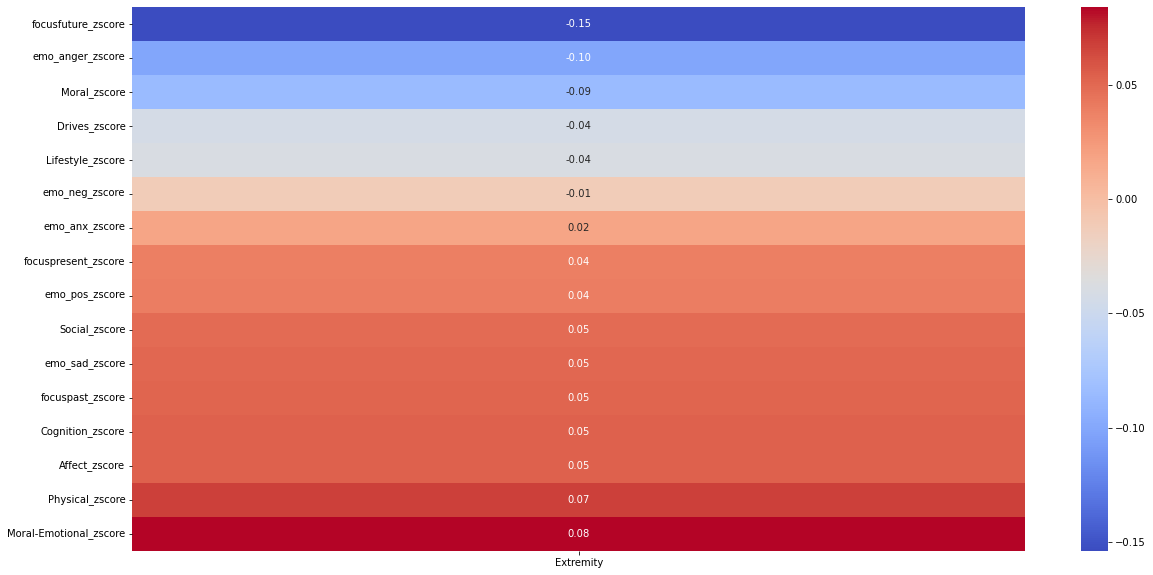

<Figure size 432x288 with 0 Axes>

In [5]:
# Calculate the correlation matrix excluding the "Extremity" column
corr_matrix = df.corr()

# Extract the correlation of each variable with the "Extremity" column
extremity_correlations = corr_matrix['Extremity']

# Sort the correlations, excluding the "Extremity" and "label"columns
sorted_correlations = extremity_correlations.drop(index=['Extremity', 'label']).sort_values()

# Create a figure and axis
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed

# Create a heatmap for the extracted correlations
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, fmt=".2f")

# Show the plot
plt.show()
plt.savefig('corr_all.png')

#### Liberal

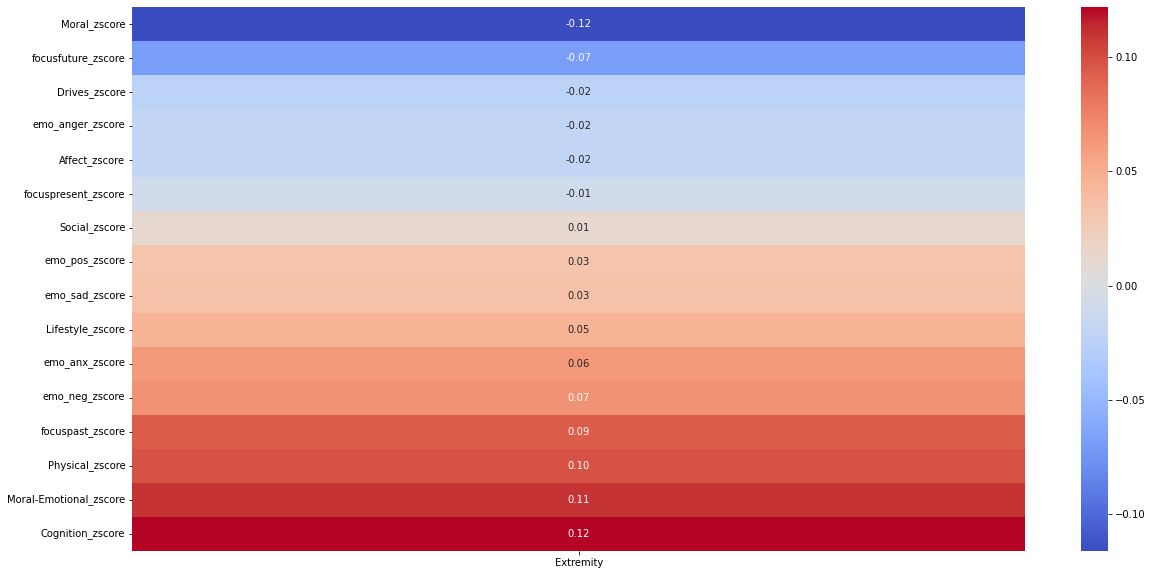

<Figure size 432x288 with 0 Axes>

In [6]:
# Calculate the correlation matrix excluding the "Extremity" column
corr_matrix = df[df['label']==1].corr()

# Extract the correlation of each variable with the "Extremity" column
extremity_correlations = corr_matrix['Extremity']

# Sort the correlations, excluding the "Extremity" and "label"columns
sorted_correlations = extremity_correlations.drop(index=['Extremity', 'label']).sort_values()

# Create a figure and axis
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed

# Create a heatmap for the extracted correlations
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, fmt=".2f")

# Show the plot
plt.show()
plt.savefig('corr_liberal.png')

#### Conservative

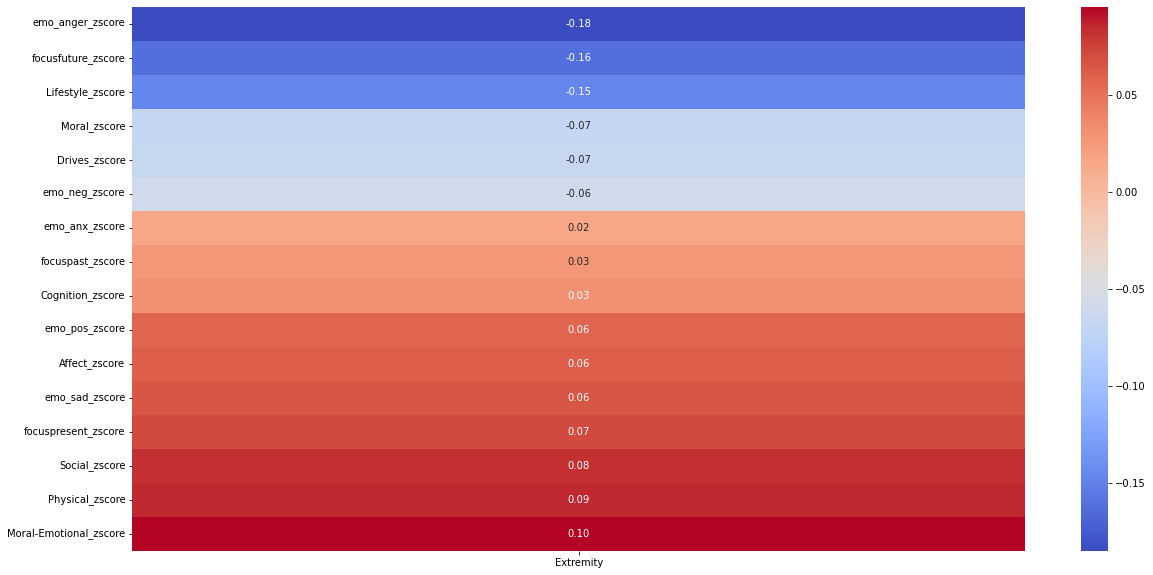

<Figure size 432x288 with 0 Axes>

In [7]:
# Calculate the correlation matrix excluding the "Extremity" column
corr_matrix = df[df['label']==0].corr()

# Extract the correlation of each variable with the "Extremity" column
extremity_correlations = corr_matrix['Extremity']

# Sort the correlations, excluding the "Extremity" and "label"columns
sorted_correlations = extremity_correlations.drop(index=['Extremity', 'label']).sort_values()

# Create a figure and axis
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed

# Create a heatmap for the extracted correlations
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, fmt=".2f")

# Show the plot
plt.show()
plt.savefig('corr_conservative.png')

## Regression Models -->

## Descriptive Visuals

## Using new data

In [2]:
df = pd.read_csv("../base_regression/only_test_11919_entity/liwc_data.csv")
df

,Extremity,label,WC,number,quantity,Drives,affiliation,achieve,power,cogproc,...,visual,auditory,feeling,time,focuspast,focuspresent,focusfuture,UniquelyMoral,UniquelyEmotional,MoralEmotional
0,0.493974,0,418,2.39,4.55,2.87,0.72,0.48,1.67,4.55,...,0.48,0.00,0.00,2.15,3.59,5.02,0.48,3.11,1.67,2.39
1,0.484219,0,399,2.51,2.76,7.27,2.26,1.75,3.26,9.52,...,1.25,0.00,0.00,6.02,3.01,2.76,2.76,5.01,3.01,0.25
2,0.424244,1,406,5.17,8.62,3.94,1.23,0.00,2.71,9.85,...,0.00,0.25,0.00,3.69,9.11,0.49,0.25,1.48,6.40,0.25
3,0.485355,0,441,3.40,4.08,2.27,0.23,0.00,2.04,6.80,...,1.59,0.00,0.00,2.27,5.90,1.13,0.91,0.91,0.68,0.45
4,0.421220,1,380,2.89,3.16,7.37,2.11,0.53,4.74,6.05,...,0.00,0.00,0.00,3.16,3.68,2.11,0.26,3.16,2.11,1.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.483440,0,402,6.97,11.19,3.48,0.00,0.50,2.99,10.95,...,0.00,0.00,0.00,3.73,2.49,2.74,1.49,4.23,1.99,0.75
176,0.464568,0,404,0.74,4.46,3.96,0.25,1.49,2.23,8.42,...,0.50,0.00,0.25,3.47,4.95,5.94,0.50,0.74,2.72,0.99
177,0.488982,1,181,0.00,2.76,11.60,1.66,1.10,8.84,9.39,...,0.00,0.00,0.00,5.52,4.97,3.31,1.66,3.87,3.87,0.00
178,0.490812,1,197,4.57,6.09,6.60,1.02,1.52,4.06,8.12,...,0.00,0.00,0.00,7.11,3.55,1.02,0.51,2.03,3.55,0.51


In [3]:
selected_columns = df.iloc[:, 2:52]

In [4]:
z_scores = selected_columns.apply(zscore)

In [5]:
# Add the z-scores back to the DataFrame
for i, col in enumerate(selected_columns.columns):
    df[f'{col}_zscore'] = z_scores.iloc[:, i]

In [6]:
df

,Extremity,label,WC,number,quantity,Drives,affiliation,achieve,power,cogproc,...,visual_zscore,auditory_zscore,feeling_zscore,time_zscore,focuspast_zscore,focuspresent_zscore,focusfuture_zscore,UniquelyMoral_zscore,UniquelyEmotional_zscore,MoralEmotional_zscore
0,0.493974,0,418,2.39,4.55,2.87,0.72,0.48,1.67,4.55,...,0.011864,-0.393183,-0.383800,-1.391827,-0.490374,1.515287,-0.596474,-0.233281,-1.024682,2.505994
1,0.484219,0,399,2.51,2.76,7.27,2.26,1.75,3.26,9.52,...,1.707091,-0.393183,-0.383800,0.795137,-0.785854,-0.083600,2.237105,0.862325,-0.041809,-0.647374
2,0.424244,1,406,5.17,8.62,3.94,1.23,0.00,2.71,9.85,...,-1.044901,0.629548,-0.383800,-0.521562,2.321788,-1.689561,-0.882317,-1.173194,2.444713,-0.647374
3,0.485355,0,441,3.40,4.08,2.27,0.23,0.00,2.04,6.80,...,2.455633,-0.393183,-0.383800,-1.324014,0.686455,-1.236779,-0.062071,-1.501876,-1.750834,-0.352666
4,0.421220,1,380,2.89,3.16,7.37,2.11,0.53,4.74,6.05,...,-1.044901,-0.393183,-0.383800,-0.821069,-0.444523,-0.543456,-0.869889,-0.204449,-0.701947,0.929310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.483440,0,402,6.97,11.19,3.48,0.00,0.50,2.99,10.95,...,-1.044901,-0.393183,-0.383800,-0.498958,-1.050768,-0.097749,0.658752,0.412550,-0.789966,0.089395
176,0.464568,0,404,0.74,4.46,3.96,0.25,1.49,2.23,8.42,...,0.055896,-0.393183,0.440591,-0.645886,0.202478,2.166162,-0.571618,-1.599904,-0.254520,0.443043
177,0.488982,1,181,0.00,2.76,11.60,1.66,1.10,8.84,9.39,...,-1.044901,-0.393183,-0.383800,0.512583,0.212667,0.305510,0.870027,0.204961,0.588990,-1.015758
178,0.490812,1,197,4.57,6.09,6.60,1.02,1.52,4.06,8.12,...,-1.044901,-0.393183,-0.383800,1.411104,-0.510752,-1.314601,-0.559190,-0.856046,0.354274,-0.264254


## Moral

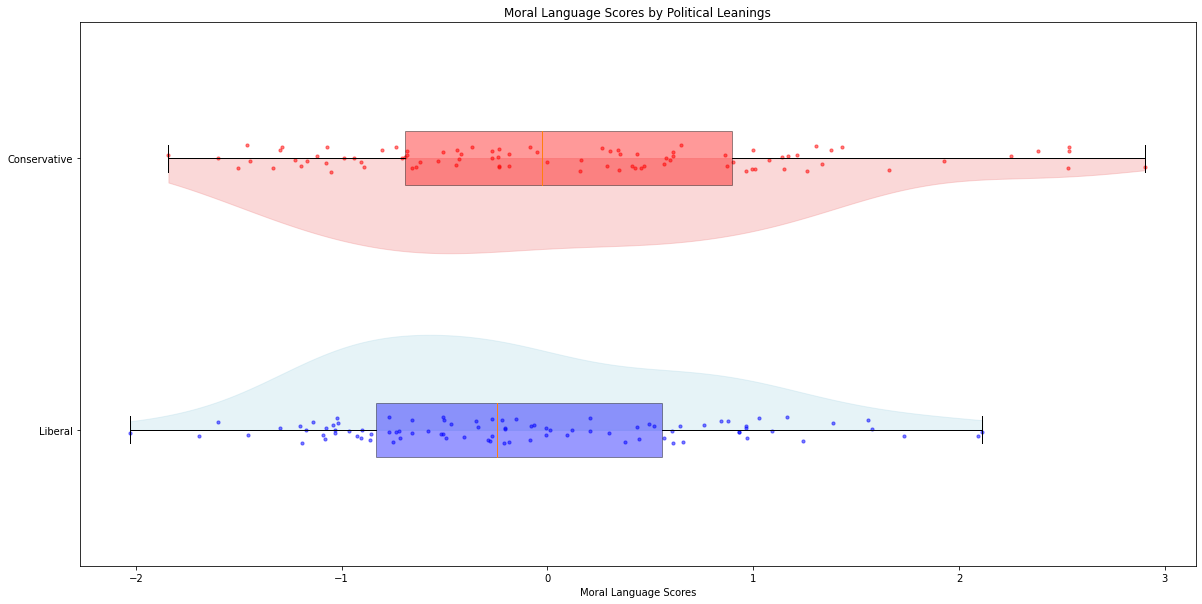

<Figure size 432x288 with 0 Axes>

In [7]:
data_liberal = df[df['label']==1]['UniquelyMoral_zscore']
data_conservative = df[df['label']==0]['UniquelyMoral_zscore']

fig, ax = plt.subplots(figsize=(20, 10))

# Boxplot data
bp_liberal = ax.boxplot(data_liberal, patch_artist=True, vert=False, positions=[1], widths=0.2)
bp_conservative = ax.boxplot(data_conservative, patch_artist=True, vert=False, positions=[2], widths=0.2)

# Change boxplot colors
for patch in bp_liberal['boxes']:
    patch.set_facecolor('blue')
    patch.set_alpha(0.4)

for patch in bp_conservative['boxes']:
    patch.set_facecolor('red')
    patch.set_alpha(0.4)

# Violinplot data
vp_liberal = ax.violinplot(data_liberal, points=500, vert=False, widths=0.7, showmeans=False, showextrema=False, showmedians=False)
vp_conservative = ax.violinplot(data_conservative, points=500, vert=False, widths=0.7, showmeans=False, showextrema=False, showmedians=False)

# Change violinplot colors
for b in vp_liberal['bodies']:
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], 1, 2)
    b.set_color('lightblue')

for b in vp_conservative['bodies']:
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    shift_amount = 1  # Adjust this value to align the violin plot with the label
    b.get_paths()[0].vertices[:, 1] += shift_amount  # Shift the violin plot up
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], 1, 2)
    b.set_color('lightcoral')

# Scatterplot data
scatter_colors = ['blue', 'red']
for idx, features in enumerate([data_liberal, data_conservative]):
    y = np.full(len(features), idx + 1)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    plt.scatter(features, y, s=10, c=scatter_colors[idx], alpha=0.5)

plt.yticks([1, 2], ['Liberal', 'Conservative'])  # Set y-axis labels
plt.xlabel('Moral Language Scores')
plt.title("Moral Language Scores by Political Leanings")
plt.show()
plt.savefig('11919moral_box.png')

## Emotional

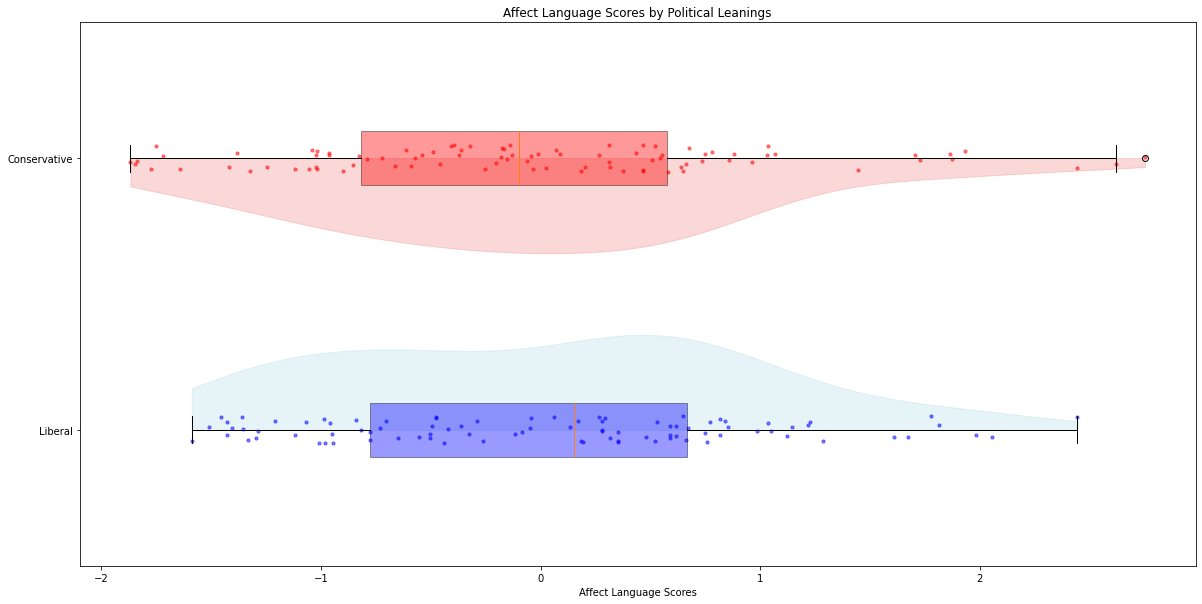

<Figure size 432x288 with 0 Axes>

In [8]:
data_liberal = df[df['label']==1]['UniquelyEmotional_zscore']
data_conservative = df[df['label']==0]['UniquelyEmotional_zscore']

fig, ax = plt.subplots(figsize=(20, 10))

# Boxplot data
bp_liberal = ax.boxplot(data_liberal, patch_artist=True, vert=False, positions=[1], widths=0.2)
bp_conservative = ax.boxplot(data_conservative, patch_artist=True, vert=False, positions=[2], widths=0.2)

# Change boxplot colors
for patch in bp_liberal['boxes']:
    patch.set_facecolor('blue')
    patch.set_alpha(0.4)

for patch in bp_conservative['boxes']:
    patch.set_facecolor('red')
    patch.set_alpha(0.4)

# Violinplot data
vp_liberal = ax.violinplot(data_liberal, points=500, vert=False, widths=0.7, showmeans=False, showextrema=False, showmedians=False)
vp_conservative = ax.violinplot(data_conservative, points=500, vert=False, widths=0.7, showmeans=False, showextrema=False, showmedians=False)

# Change violinplot colors
for b in vp_liberal['bodies']:
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], 1, 2)
    b.set_color('lightblue')

for b in vp_conservative['bodies']:
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    shift_amount = 1  # Adjust this value to align the violin plot with the label
    b.get_paths()[0].vertices[:, 1] += shift_amount  # Shift the violin plot up
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], 1, 2)
    b.set_color('lightcoral')

# Scatterplot data
scatter_colors = ['blue', 'red']
for idx, features in enumerate([data_liberal, data_conservative]):
    y = np.full(len(features), idx + 1)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    plt.scatter(features, y, s=10, c=scatter_colors[idx], alpha=0.5)

plt.yticks([1, 2], ['Liberal', 'Conservative'])  # Set y-axis labels
plt.xlabel('Affect Language Scores')
plt.title("Affect Language Scores by Political Leanings")
plt.show()
plt.savefig('11919emotional_box.png')

## Moral - Emotional

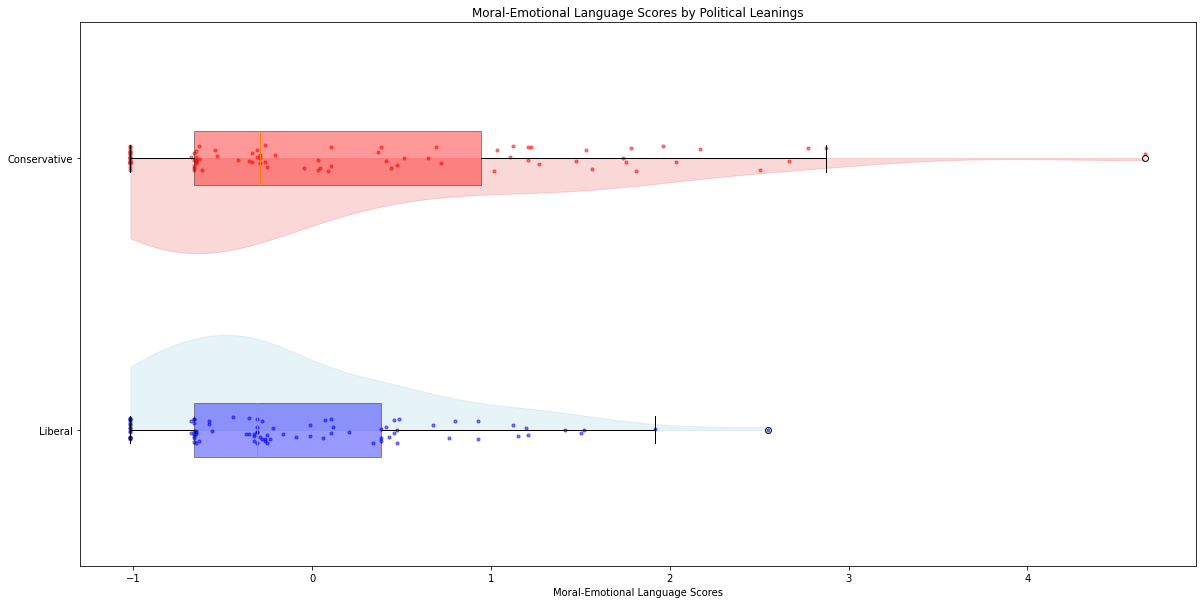

<Figure size 432x288 with 0 Axes>

In [9]:
data_liberal = df[df['label']==1]['MoralEmotional_zscore']
data_conservative = df[df['label']==0]['MoralEmotional_zscore']

fig, ax = plt.subplots(figsize=(20, 10))

# Boxplot data
bp_liberal = ax.boxplot(data_liberal, patch_artist=True, vert=False, positions=[1], widths=0.2)
bp_conservative = ax.boxplot(data_conservative, patch_artist=True, vert=False, positions=[2], widths=0.2)

# Change boxplot colors
for patch in bp_liberal['boxes']:
    patch.set_facecolor('blue')
    patch.set_alpha(0.4)

for patch in bp_conservative['boxes']:
    patch.set_facecolor('red')
    patch.set_alpha(0.4)

# Violinplot data
vp_liberal = ax.violinplot(data_liberal, points=500, vert=False, widths=0.7, showmeans=False, showextrema=False, showmedians=False)
vp_conservative = ax.violinplot(data_conservative, points=500, vert=False, widths=0.7, showmeans=False, showextrema=False, showmedians=False)

# Change violinplot colors
for b in vp_liberal['bodies']:
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], 1, 2)
    b.set_color('lightblue')

for b in vp_conservative['bodies']:
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    shift_amount = 1  # Adjust this value to align the violin plot with the label
    b.get_paths()[0].vertices[:, 1] += shift_amount  # Shift the violin plot up
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], 1, 2)
    b.set_color('lightcoral')

# Scatterplot data
scatter_colors = ['blue', 'red']
for idx, features in enumerate([data_liberal, data_conservative]):
    y = np.full(len(features), idx + 1)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    plt.scatter(features, y, s=10, c=scatter_colors[idx], alpha=0.5)

plt.yticks([1, 2], ['Liberal', 'Conservative'])  # Set y-axis labels
plt.xlabel('Moral-Emotional Language Scores')
plt.title("Moral-Emotional Language Scores by Political Leanings")
plt.show()
plt.savefig('11919moralemotional_box.png')

## Statistical

## Moral

In [10]:
import pandas as pd
from scipy.stats import ttest_ind

# Separate the moral language scores by label
liberal_scores = df[df['label'] == 1]['UniquelyMoral_zscore']
conservative_scores = df[df['label'] == 0]['UniquelyMoral_zscore']

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(liberal_scores, conservative_scores)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean Moral Language scores between liberal and conservative articles.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean Moral Language scores between liberal and conservative articles.")


T-statistic: -1.6520407216385857
P-value: 0.10028918317749781
Fail to reject the null hypothesis. There is no significant difference in mean Moral Language scores between liberal and conservative articles.


## Emotional

In [11]:
import pandas as pd
from scipy.stats import ttest_ind

# Separate the moral language scores by label
liberal_scores = df[df['label'] == 1]['UniquelyEmotional_zscore']
conservative_scores = df[df['label'] == 0]['UniquelyEmotional_zscore']

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(liberal_scores, conservative_scores)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean Affect Language scores between liberal and conservative articles.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean Affect Language scores between liberal and conservative articles.")


T-statistic: 0.40031625714318475
P-value: 0.6894036247100295
Fail to reject the null hypothesis. There is no significant difference in mean Affect Language scores between liberal and conservative articles.


## Moral - Emotional

In [12]:
import pandas as pd
from scipy.stats import ttest_ind

# Separate the moral language scores by label
liberal_scores = df[df['label'] == 1]['MoralEmotional_zscore']
conservative_scores = df[df['label'] == 0]['MoralEmotional_zscore']

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(liberal_scores, conservative_scores)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean Moral-Emotional Language scores between liberal and conservative articles.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean Moral-Emotional Language scores between liberal and conservative articles.")


T-statistic: -1.7089281050496932
P-value: 0.08920719452265824
Fail to reject the null hypothesis. There is no significant difference in mean Moral-Emotional Language scores between liberal and conservative articles.
